In [149]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea #Used for data visualization. Built on top of matplotlib.
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Load dataset with pandas library
d = pd.read_csv("/Users/abhinavgupta/Library/Mobile Documents/com~apple~CloudDocs/social media advertisement/dataset sma/ads.csv")

# Quick check
d.head()


,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,28,Facebook,Video,Female,35-44,"art, technology"
1,2,33,Facebook,Stories,All,25-34,"travel, photography"
2,3,20,Instagram,Carousel,All,25-34,technology
3,4,28,Facebook,Stories,Female,25-34,news
4,5,24,Instagram,Image,Female,25-34,news


In [150]:
d.shape # R over C (ps)

(200, 7)

In [151]:
d.dtypes #(ps)

ad_id                int64
campaign_id          int64
ad_platform         object
ad_type             object
target_gender       object
target_age_group    object
target_interests    object
dtype: object

In [152]:
d.describe() 

,ad_id,campaign_id
count,200.000000,200.000000
mean,100.500000,25.125000
std,57.879185,13.713485
min,1.000000,1.000000
25%,50.750000,13.000000
50%,100.500000,25.000000
75%,150.250000,37.000000
max,200.000000,50.000000


In [153]:
d.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ad_id             200 non-null    int64 
 1   campaign_id       200 non-null    int64 
 2   ad_platform       200 non-null    object
 3   ad_type           200 non-null    object
 4   target_gender     200 non-null    object
 5   target_age_group  200 non-null    object
 6   target_interests  200 non-null    object
dtypes: int64(2), object(5)
memory usage: 11.1+ KB


In [154]:
d.duplicated().sum()

0

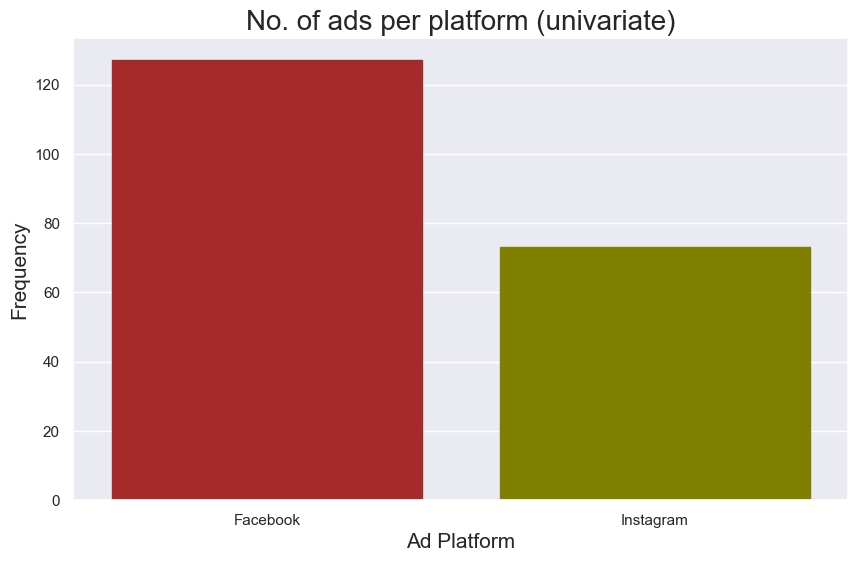

In [155]:
plt.figure(figsize=(10,6))
sea.set(style=('darkgrid'))
gph = sea.countplot(data=d, x='ad_platform')
gph.set_xlabel('Ad Platform', fontsize=15) 
gph.set_ylabel('Frequency', fontsize=15)
gph.patches[0].set_color('brown') 
gph.patches[1].set_color('olive')
gph = gph.set_title('No. of ads per platform (univariate)', fontsize=20)

plt.show()

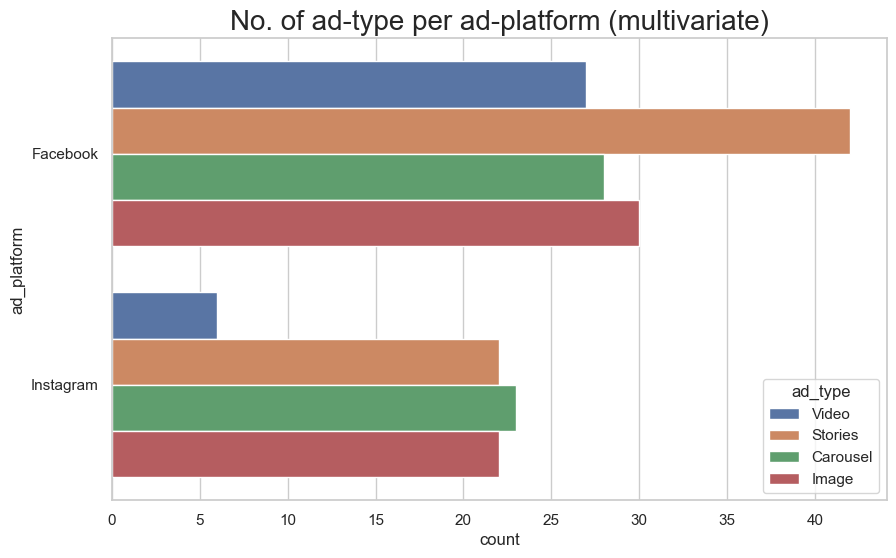

In [156]:
plt.figure(figsize=(10,6))
sea.set(style=('whitegrid'))
gph = sea.countplot(data=d, y='ad_platform', hue='ad_type')
gph.set_title("No. of ad-type per ad-platform (multivariate)", fontsize=20)
plt.show()

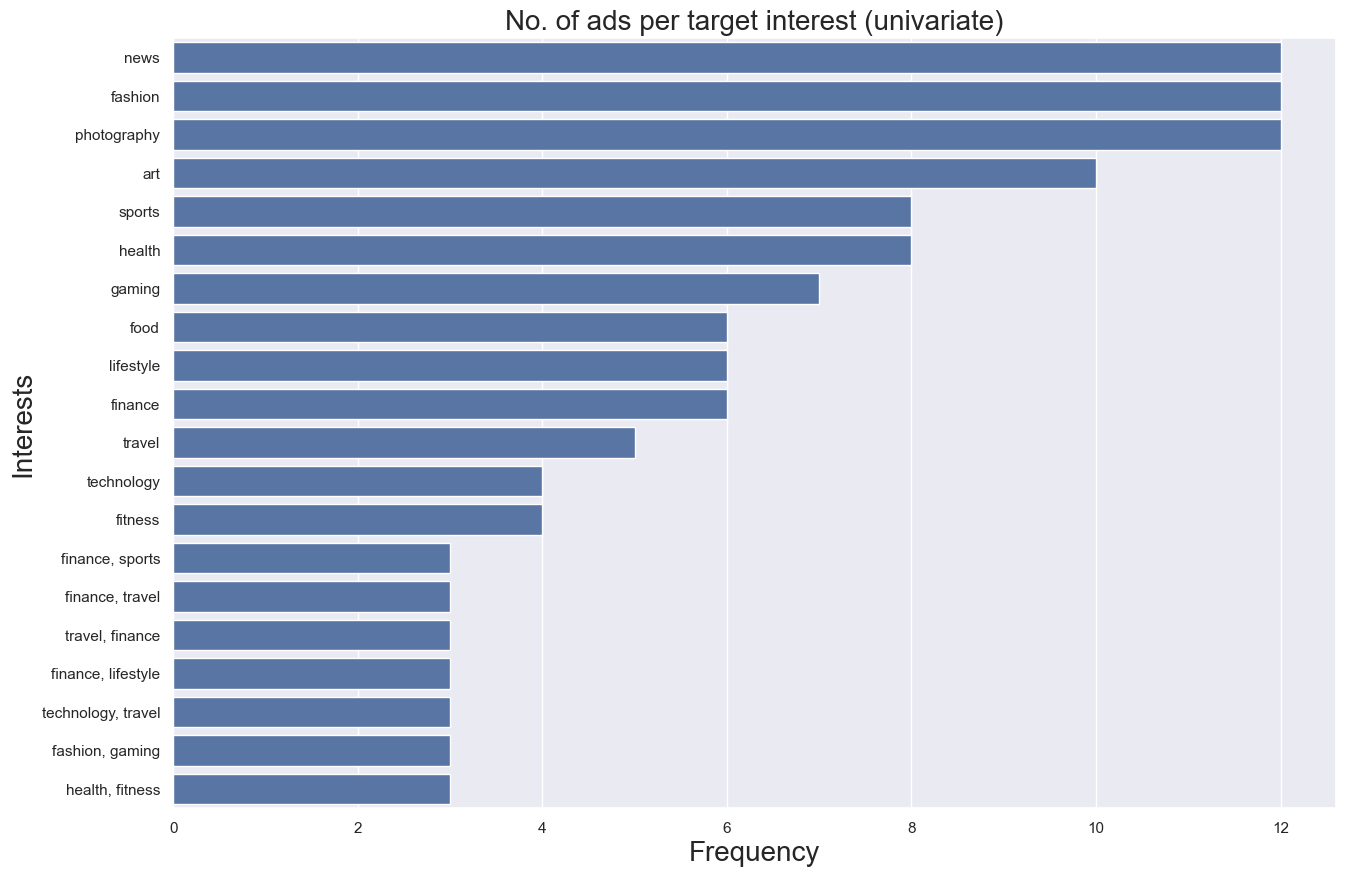

In [157]:
plt.figure(figsize=(15,10))
sea.set(style=('darkgrid'))
gph = sea.countplot(data=d, y='target_interests', order=d['target_interests'].value_counts().index[:20]) 
gph.set_xlabel('Frequency', fontsize=20)
gph.set_ylabel('Interests', fontsize=20)
gph.set_title('No. of ads per target interest (univariate)', fontsize=20)
plt.show()

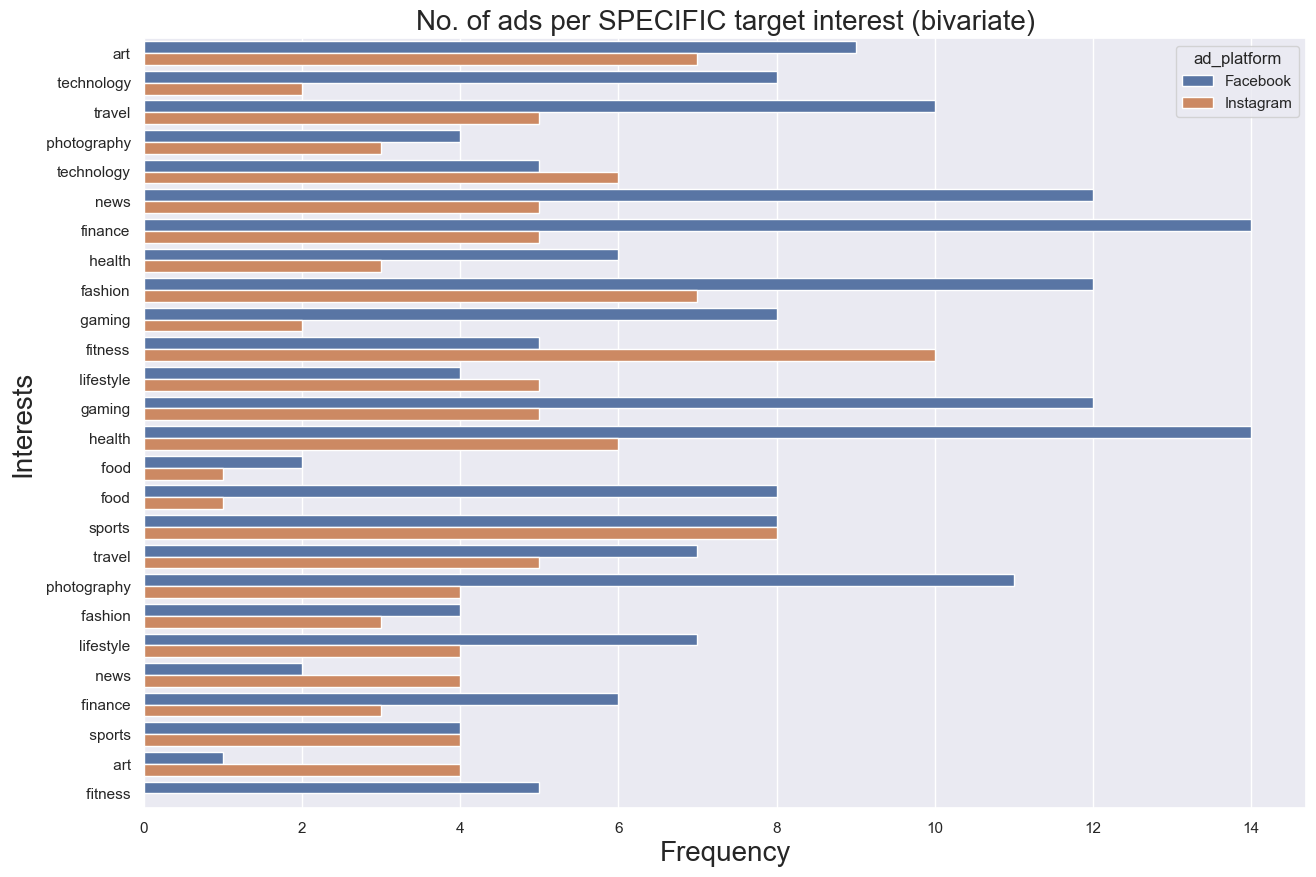

In [158]:

d['target_interests'] = d['target_interests'].str.split(',') # spliting multiple intersets in a list. For Example: "finance, sports" -> ["finance", "sports"]
d_exploded = d.explode('target_interests') # each interest in a separate row

plt.figure(figsize=(15,10))
sea.set(style='darkgrid')
gph = sea.countplot(data=d_exploded, y='target_interests', hue='ad_platform', order=d_exploded['target_interests'])

gph.set_xlabel('Frequency', fontsize=20)
gph.set_ylabel('Interests', fontsize=20)
gph.set_title('No. of ads per SPECIFIC target interest (bivariate)', fontsize=20)
plt.show()

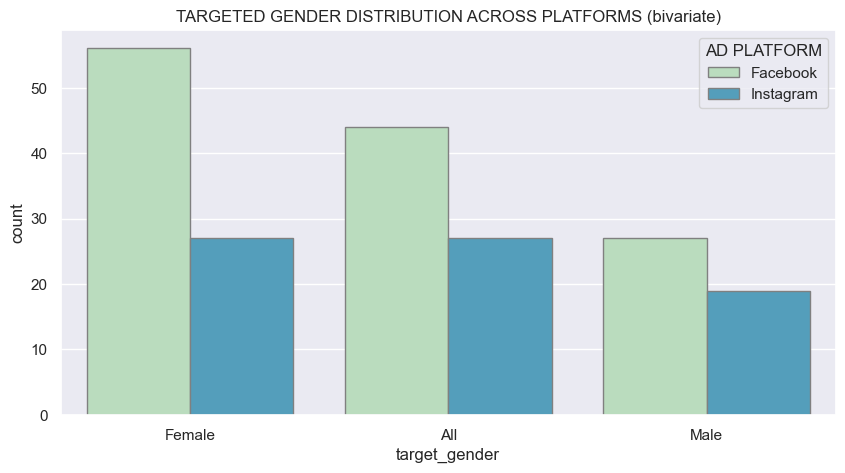

In [159]:
plt.figure(figsize=(10,5))
sea.countplot(data=d,x='target_gender',hue='ad_platform',palette='GnBu',edgecolor='grey')
plt.title('TARGETED GENDER DISTRIBUTION ACROSS PLATFORMS (bivariate)')
plt.legend(title='AD PLATFORM')
plt.show()

In [162]:
age_map = {'18-24':21, '25-34':29.5, '35-44':39.5, '45-54':49.5, '55-64':59.5, '65+':70}
d['target_age_numeric'] = d['target_age_group'].map(age_map) # mapping age

grouped = d.groupby(['ad_platform', 'ad_type'])['target_age_numeric'].mean()
print(grouped)

ad_platform  ad_type 
Facebook     Carousel    30.818182
             Image       27.600000
             Stories     29.806452
             Video       29.605263
Instagram    Carousel    30.025000
             Image       30.450000
             Stories     32.694444
             Video       27.375000
Name: target_age_numeric, dtype: float64


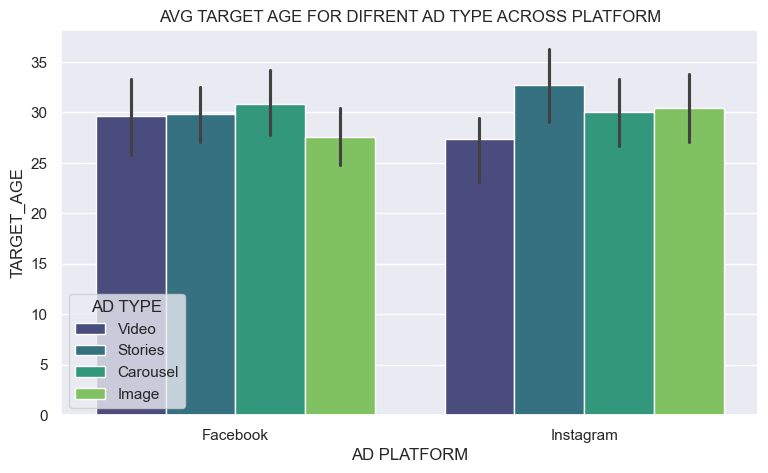

In [ ]:
cleaned_data = d.dropna(subset=['target_age_numeric'])
plt.figure(figsize=(9,5))
sea.barplot(data = d, x='ad_platform',y='target_age_numeric',hue='ad_type',edgecolor='white',palette='viridis')
plt.title('AVG TARGET AGE FOR DIFRENT AD TYPE ACROSS PLATFORM (multivariate)')
plt.legend(title='AD TYPE')
plt.xlabel('AD PLATFORM')
plt.ylabel('TARGET_AGE')
plt.show()

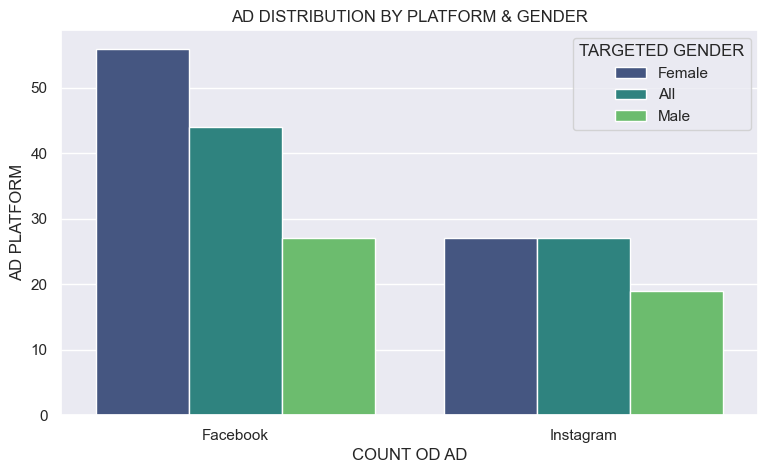

In [164]:
plt.figure(figsize=(9,5))
sea.countplot(data=d , x='ad_platform',hue='target_gender',palette='viridis',edgecolor='white')
plt.title('AD DISTRIBUTION BY PLATFORM & GENDER')
plt.legend(title='TARGETED GENDER')
plt.ylabel('AD PLATFORM')
plt.xlabel('COUNT OD AD')
plt.show()

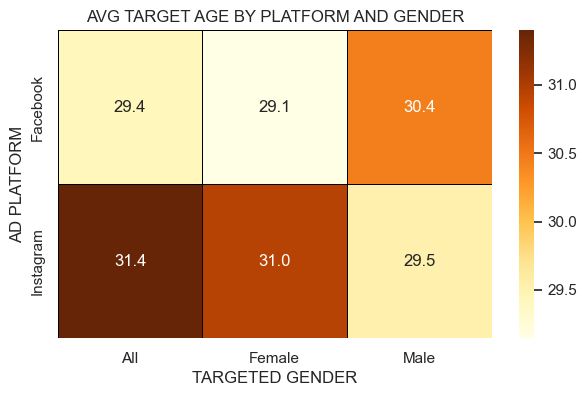

In [167]:
grouped = d.groupby(['ad_platform','target_gender'])['target_age_numeric'].mean().unstack()

plt.figure(figsize=(7,4))
sea.heatmap(grouped, annot=True, fmt=".1f", cmap='YlOrBr',linewidths=0.5,linecolor='black')
plt.title('AVG TARGET AGE BY PLATFORM AND GENDER')
plt.xlabel('TARGETED GENDER')
plt.ylabel('AD PLATFORM')
plt.show()